<a href="https://colab.research.google.com/github/hoangvn111/Data-Cleaning-and-Analysis/blob/master/Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Aggregation

## World Happiness 2015

In [72]:
import pandas as pd 

happiness2015 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2015.csv')

Introduce data

In [73]:
first_5 = happiness2015.head().copy()

In [74]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [75]:
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Descriptions for some of the columns we'll be working with:

* Country - Name of the country.
* Region - Name of the region the country belongs to.
* Happiness Rank - The rank of the country, as determined by its happiness score.
* Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
* Family - The estimated extent to which family contributes to the happiness score.
* Freedom - The estimated extent to which freedom contributes to the happiness score.
* Generosity - The estimated extent to which generosity contributes to the happiness score.

Use Loops to Aggregate Data

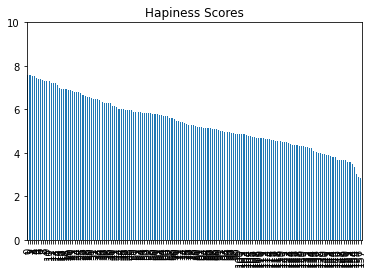

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

happiness2015['Happiness Score'].plot(kind='bar', title='Hapiness Scores', ylim=(0,10))
plt.show()

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.
You may have noticed that each country in the **happiness2015** dataframe is assigned to a region, specified in the **Region** column. We can use the Series.unique() method to confirm the unique regions:

In [77]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

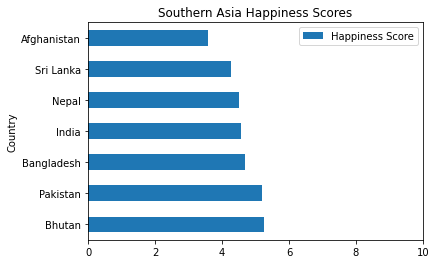

In [78]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

In [79]:
mean_happiness = {}
regions= happiness2015['Region'].unique()
for reg in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == reg]
    #2. Apply a function to each group
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure
    mean_happiness[reg] = region_mean

mean_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

Combine Aggregation Methods with GroupBy




In [80]:
happiness2015.groupby('Region').mean()['Happiness Score']

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [81]:
# Use get_group() to select data for a certain group.
aus_nz = happiness2015.groupby('Region').get_group('Australia and New Zealand') 
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [82]:
grouped = happiness2015.groupby('Region')
grouped.groups # Get index of rows

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [83]:
north_america = grouped.get_group('North America')
na_group = happiness2015.iloc[[4,14]]
na_group == north_america

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


In [84]:
# GroupBy.size() method to confirm the size of each region group
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Agg() Medthod

In [85]:
# GroupBy.agg() method can perform both aggregations at once
import numpy as np
grouped.agg([np.max, np.min, np.sum, np.mean])

Happiness Rank       ... Dystopia Residual          
                                          amax amin  ...               sum      mean
Region                                               ...                            
Australia and New Zealand                   10    9  ...           4.53071  2.265355
Central and Eastern Europe                 134   31  ...          58.62059  2.021400
Eastern Asia                               100   38  ...          10.08964  1.681607
Latin America and Caribbean                119   12  ...          57.69670  2.622577
Middle East and Northern Africa            156   11  ...          39.60017  1.980009
North America                               15    5  ...           4.96187  2.480935
Southeastern Asia                          145   24  ...          16.04718  1.783020
Southern Asia                              153   79  ...          14.11738  2.016769
Sub-Saharan Africa                         158   71  ...          80.79920  2.019980
Western Europe                             102    1  ...          45.17489  2.151185

[10 rows x 40 columns]

Aggregation with Pivot Tables

In [86]:
# DataFrame.pivot_table() method
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [87]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


When we set the margins parameter equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column


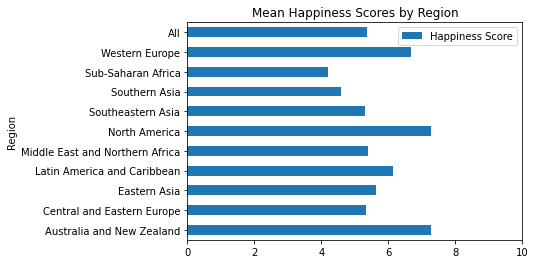

In [88]:
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

In [89]:
happiness2015['Happiness Score'].mean() == pv_happiness['Happiness Score'].mean()


False

In [90]:
pv_happiness['Happiness Score'].mean()

5.748648575587915

In [91]:
happiness2015['Happiness Score'].mean()

5.3757341772151905

In [92]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']].mean()

Aggregation Multiple Columns and Function with Pilot Tables

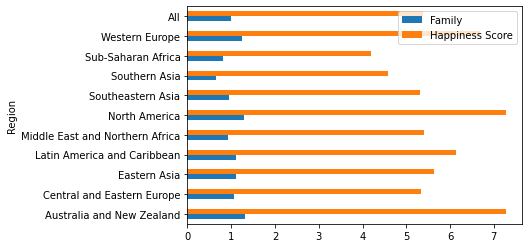

In [93]:
grouped_pv_table = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc=np.mean, margins=True)
grouped_pv_table.plot(kind='barh')
plt.show()

In [94]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = pd.pivot_table(happiness2015, values=['Happiness Score', 'Family'], index='Region',  aggfunc=[np.min, np.max, np.mean], margins=True)

pv_happy_family_stats

amin  ...            mean
                                  Family  ... Happiness Score
Region                                    ...                
Australia and New Zealand        1.30923  ...        7.285000
Central and Eastern Europe       0.38562  ...        5.332931
Eastern Asia                     0.94675  ...        5.626167
Latin America and Caribbean      0.74302  ...        6.144682
Middle East and Northern Africa  0.47489  ...        5.406900
North America                    1.24711  ...        7.273000
Southeastern Asia                0.62736  ...        5.317444
Southern Asia                    0.30285  ...        4.580857
Sub-Saharan Africa               0.00000  ...        4.202800
Western Europe                   0.89318  ...        6.689619
All                              0.00000  ...        5.375734

[11 rows x 6 columns]

# Combining Data With Pandas

In [95]:
happiness2016 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2016.csv')
happiness2017 = pd.read_csv('/content/drive/MyDrive/my_datasets/Data Cleaning and Analysis/World_Happiness_2017.csv')

In [97]:
happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [98]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [99]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


Combining Dataframes with the Concat Function

head_2015, head_2016 has the same shape

In [100]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

In [101]:
concat_axis0

,Country,Happiness Score,Year
0,Switzerland,7.587,2015
1,Iceland,7.561,2015
2,Denmark,7.527,2015
0,Denmark,7.526,2016
1,Switzerland,7.509,2016
2,Iceland,7.501,2016


In [102]:
concat_axis1

,Country,Happiness Score,Year,Country,Happiness Score,Year
0,Switzerland,7.587,2015,Denmark,7.526,2016
1,Iceland,7.561,2015,Switzerland,7.509,2016
2,Denmark,7.527,2015,Iceland,7.501,2016


Combining Dataframes with the Concat Function Continued

head_2015, head_2016 hasn't the same shape

In [103]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

In [104]:
concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

In [105]:
concat_axis0

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
0,2016,Denmark,7.526,NaN
1,2016,Switzerland,7.509,NaN
2,2016,Iceland,7.501,NaN


In [106]:
concat_axis1

,Year,Country,Happiness Score,Standard Error,Country,Happiness Score,Year
0,2015,Switzerland,7.587,0.03411,Denmark,7.526,2016.0
1,2015,Iceland,7.561,0.04884,Switzerland,7.509,2016.0
2,2015,Denmark,7.527,0.03328,Iceland,7.501,2016.0
3,2015,Norway,7.522,0.03880,NaN,NaN,NaN


Combining Dataframes with Different Shapes Using the Concat Function 

In [107]:
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)
concat_update_index

,Year,Country,Happiness Score,Standard Error
0,2015,Switzerland,7.587,0.03411
1,2015,Iceland,7.561,0.04884
2,2015,Denmark,7.527,0.03328
3,2015,Norway,7.522,0.03880
4,2016,Denmark,7.526,NaN
5,2016,Switzerland,7.509,NaN
6,2016,Iceland,7.501,NaN


Joining Dataframes with the Merge Function 

In [108]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

In [109]:
print(three_2015)
print('\n')
print(three_2016)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015


   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016


In [110]:
merged = pd.merge(left=three_2015, right=three_2016, on='Country')

In [111]:
merged

,Country,Happiness Rank_x,Year_x,Happiness Rank_y,Year_y
0,Norway,4,2015,4,2016


Joining on Columns with the Merge Function

In [112]:
# how option
merged_left = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, how='left', on='Country')

print(merged_left)
print('\n')
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN


   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


In [113]:
# suffixes option
merged_suffixes = pd.merge(left=three_2015, right=three_2016, suffixes=('_2015', '_2016'), how='left', on='Country')
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, suffixes=('_2016', '_2015'), how='left', on='Country')

print(merged_suffixes)
print('\n')
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN


   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


Join on Index with the Merge Function

In [114]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merge_index = pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015', '_2016'))
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

print(merge_index)
print('\n')
print(merge_index_left)

  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                    3      2016
3       Norway                    4  ...                    4      2016
4       Canada                    5  ...                    5      2016

[3 rows x 6 columns]


  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                  3.0    2016.0
3       Norway                    4  ...                  4.0    2016.0
4       Canada                    5  ...                  5.0    2016.0
5      Finland                    6  ...                  NaN       NaN

[4 rows x 6 columns]


In [116]:
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
merge_index_left = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'), how='left')

print(merge_index)
print('/n')
print(merge_index_left)

  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                    3      2016
3       Norway                    4  ...                    4      2016
4       Canada                    5  ...                    5      2016

[3 rows x 6 columns]
/n
  Country_2015  Happiness Rank_2015  ...  Happiness Rank_2016 Year_2016
2      Denmark                    3  ...                  3.0    2016.0
3       Norway                    4  ...                  4.0    2016.0
4       Canada                    5  ...                  5.0    2016.0
5      Finland                    6  ...                  NaN       NaN

[4 rows x 6 columns]


Challenge: Combine Data and Create a Visualization

In [119]:
means = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=np.mean)
means

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


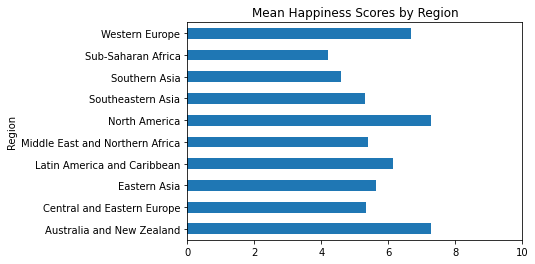

In [122]:
means.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

In [123]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual', 'Year'],
      dtype='object')

In [124]:
happiness2017.rename(columns={'Happiness.Score':'Happiness Score'}, inplace=True)

In [129]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0)
combined

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.349510,0.94143,0.665570,0.41978,0.296780,2.51738,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.402230,0.94784,0.628770,0.14145,0.436300,2.70201,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.360580,0.87464,0.649380,0.48357,0.341390,2.49204,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.330950,0.88521,0.669730,0.36503,0.346990,2.46531,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.322610,0.90563,0.632970,0.32957,0.458110,2.45176,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,NaN,NaN,3.471,NaN,NaN,0.945707,NaN,0.581844,NaN,0.252756,NaN,2017,NaN,NaN,151.0,3.543030,3.398970,0.368746,0.326425,0.455220,0.540061
151,Syria,NaN,NaN,3.462,NaN,NaN,0.396103,NaN,0.081539,NaN,0.493664,NaN,2017,NaN,NaN,152.0,3.663669,3.260331,0.777153,0.500533,0.151347,1.061574
152,Tanzania,NaN,NaN,3.349,NaN,NaN,1.041990,NaN,0.390018,NaN,0.354256,NaN,2017,NaN,NaN,153.0,3.461430,3.236570,0.511136,0.364509,0.066035,0.621130
153,Burundi,NaN,NaN,2.905,NaN,NaN,0.629794,NaN,0.059901,NaN,0.204435,NaN,2017,NaN,NaN,154.0,3.074690,2.735310,0.091623,0.151611,0.084148,1.683024


In [130]:
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year')
pivot_table_combined

,Happiness Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


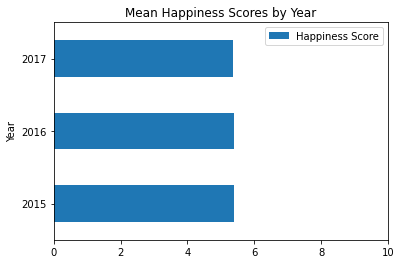

In [133]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10), legend=True)